# Forecast the sales for 1 year for the furniture products category on the basis of the historical data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
!pip install xlrd

In [5]:
#Importing data
df = pd.read_excel(r'/content/drive/MyDrive/PGA 39/ML/Time Series/Sample - Superstore.xls',header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [7]:
df["Category"].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


### Filtering the data based on Furniture category

In [8]:
furniture = df[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [9]:
furniture.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [10]:
#furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [11]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

The data available is from Jan 2014 to Dec 2017 for analysis

### 1. Single Dimensional Data

In [12]:
furniture=furniture[["Order Date","Sales"]]
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [13]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


### 2. Sorting the date/time into chronological order

In [14]:
furniture = furniture.sort_values('Order Date',ascending=True)
#furniture.isnull().sum()
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [15]:
furniture.head(20)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [16]:
furniture["Order Date"].value_counts()

,count
Order Date,
2016-09-05,10
2017-10-30,9
2016-12-01,9
2016-12-25,9
2017-11-19,9
...,...
2014-02-20,1
2014-02-18,1
2014-02-12,1


### 3. Grouping the data based on date/time

In [17]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [18]:
furniture.head(30)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


### 4,. Set date/time as index of the data

In [19]:
furniture = furniture.set_index('Order Date')

In [20]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [21]:
furniture.shape

(889, 1)

### 5. Equally spaced date/time

In [22]:
y = furniture['Sales'].resample("M").sum()

/tmp/ipython-input-3851162829.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = furniture['Sales'].resample("M").sum()


In [23]:
y

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


In [24]:
y

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


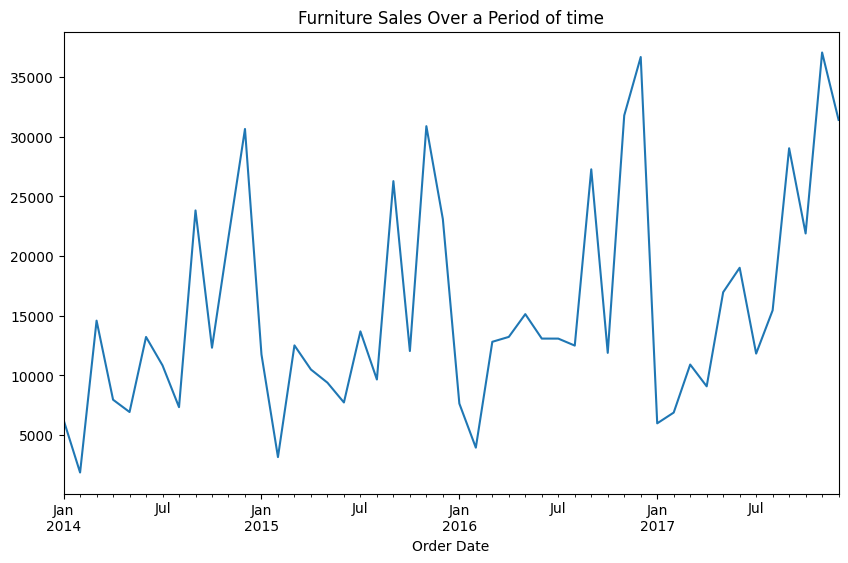

In [25]:
y.plot(figsize=(10, 6))
plt.title("Furniture Sales Over a Period of time")
plt.show()

In [26]:
y

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


### Train Test split - Manually

In [27]:
#Training Data
train=y.loc[:'2016-12-31']
train


,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


In [28]:
test=y.loc['2017-01-31':]  # validation split
test

,Sales
Order Date,
2017-01-31,5964.0320
2017-02-28,6866.3374
2017-03-31,10893.4448
2017-04-30,9065.9581
2017-05-31,16957.5582
2017-06-30,19008.5867
2017-07-31,11813.0220
2017-08-31,15441.8740
2017-09-30,29028.2060


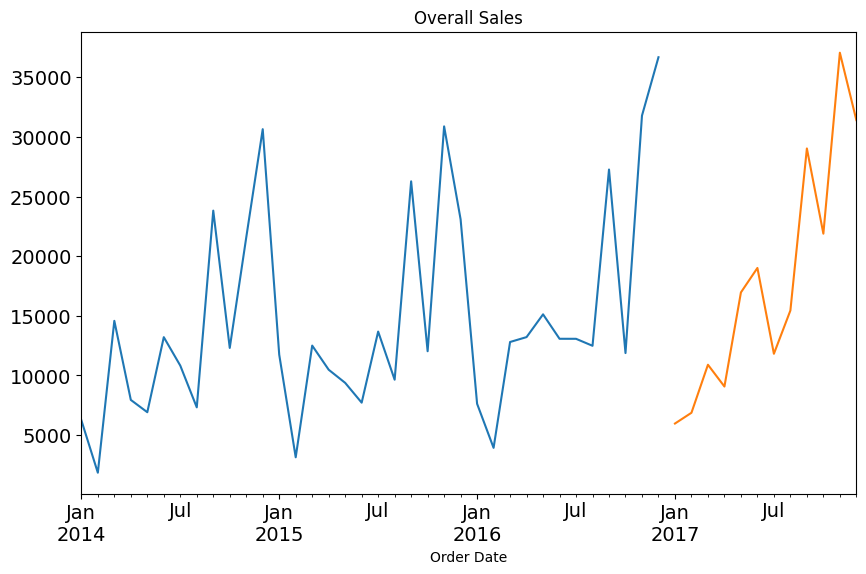

In [29]:
#Plotting data
train.plot(figsize=(10,6), title= 'Overall Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Overall Sales', fontsize=14)
plt.show()

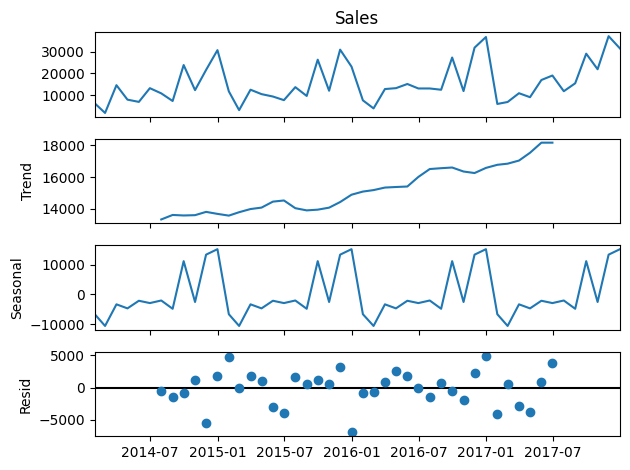

In [30]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


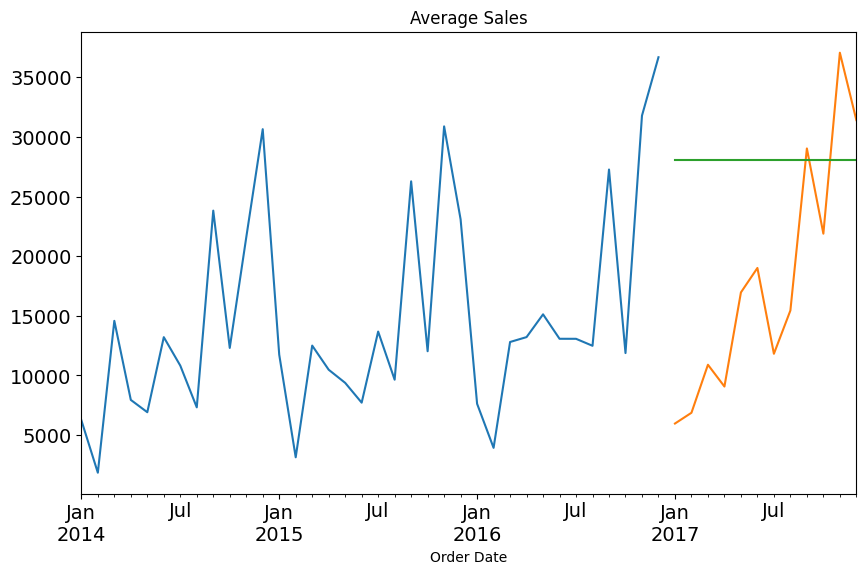

In [31]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.4)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [32]:
Exp_Smooth.SES

,0
2017-01-31,28040.413727
2017-02-28,28040.413727
2017-03-31,28040.413727
2017-04-30,28040.413727
2017-05-31,28040.413727
2017-06-30,28040.413727
2017-07-31,28040.413727
2017-08-31,28040.413727
2017-09-30,28040.413727
2017-10-31,28040.413727


In [33]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

np.float64(655.6838378457417)

In [34]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

13987.25234715839


/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


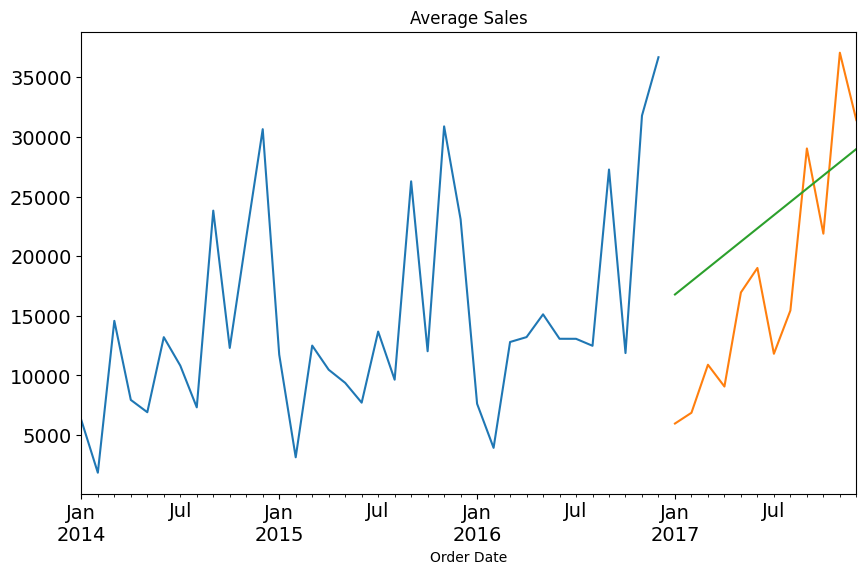

In [35]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.4)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [36]:
fit1.aic

np.float64(694.039127812049)

In [37]:
Holt_df['Holt_linear']

,0
2017-01-31,16784.517387
2017-02-28,17893.627252
2017-03-31,19002.737117
2017-04-30,20111.846981
2017-05-31,21220.956846
2017-06-30,22330.066711
2017-07-31,23439.176575
2017-08-31,24548.286440
2017-09-30,25657.396305
2017-10-31,26766.506169


In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,Holt_df['Holt_linear'] ))
print(rms)

8160.484738433992


In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #smoothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic

In [41]:

for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])


(np.float64(0.55), np.float64(0.16)) : 666.9320948866841


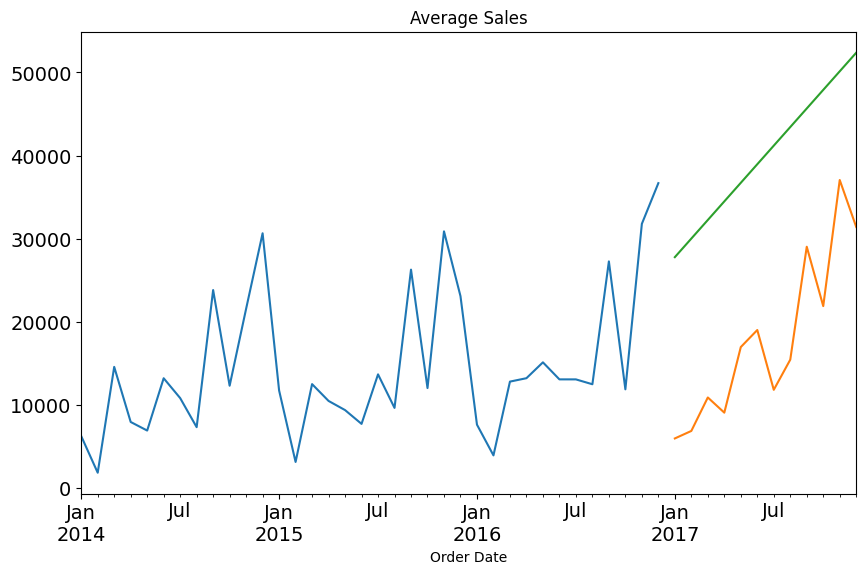

In [42]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.05,smoothing_trend = 0.19)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

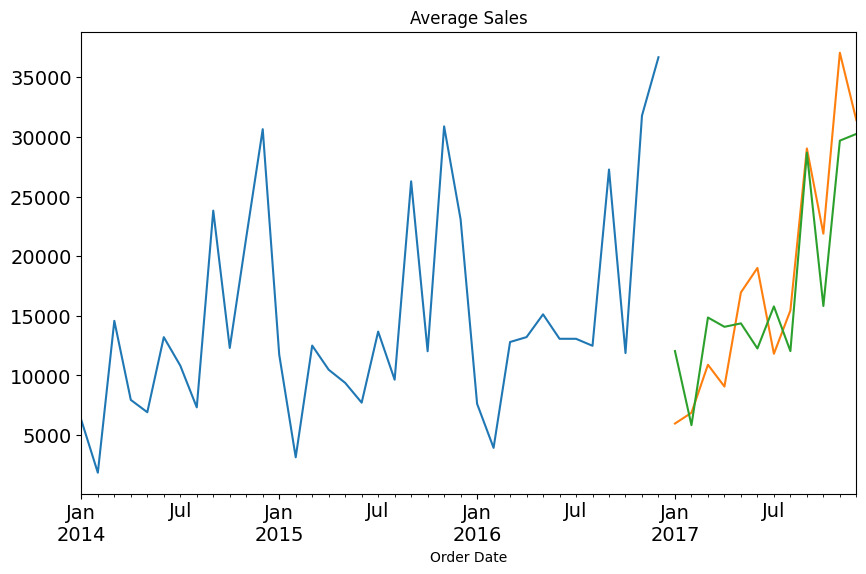

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [44]:
fit1.aic

np.float64(601.0561276539776)

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

4574.407982734602


In [46]:
Holt_Winter_df['Holt_Winter']

,0
2017-01-31,12041.874625
2017-02-28,5825.080387
2017-03-31,14855.287616
2017-04-30,14074.401977
2017-05-31,14362.775946
2017-06-30,12258.599398
2017-07-31,15785.773356
2017-08-31,12034.340592
2017-09-30,28681.814300
2017-10-31,15818.376601


#### Forecasting for 2018

In [47]:
y

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


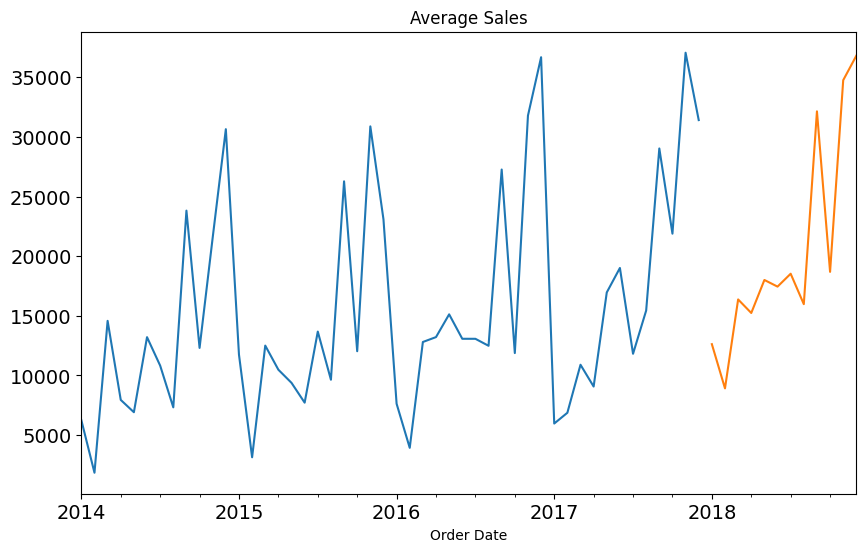

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [57]:
Y_predictions

,0
2018-01-31,12620.373332
2018-02-28,8911.553880
2018-03-31,16369.990671
2018-04-30,15233.354183
2018-05-31,18001.357743
2018-06-30,17444.381119
2018-07-31,18525.513694
2018-08-31,15973.484123
2018-09-30,32141.660110
2018-10-31,18681.996906


In [58]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx", header=["Sales"], index=True)

In [59]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 15.2 MB/s eta 0:00:00


In [60]:
import pmdarima as pm

In [61]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=708.796, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=709.325, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=709.756, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=711.529, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=707.976, Time=0.16 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=707.744, Time=0.29 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=709.727, Time=1.25 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=709.738, Time=0.62 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=709.855, Time=0.34 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=711.534, Time=0.90 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=709.579, Time=0.23 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=709.985, Time=0.22 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=711.977, Time=0.39 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=708.710, Time=0.13 sec

Best model:  ARIMA(0,0,0)(2,1,0)

In [62]:
model.aic()

np.float64(707.7441628897525)

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(0,0,0),seasonal_order=(2,1,0,12)).fit()

In [64]:
y

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


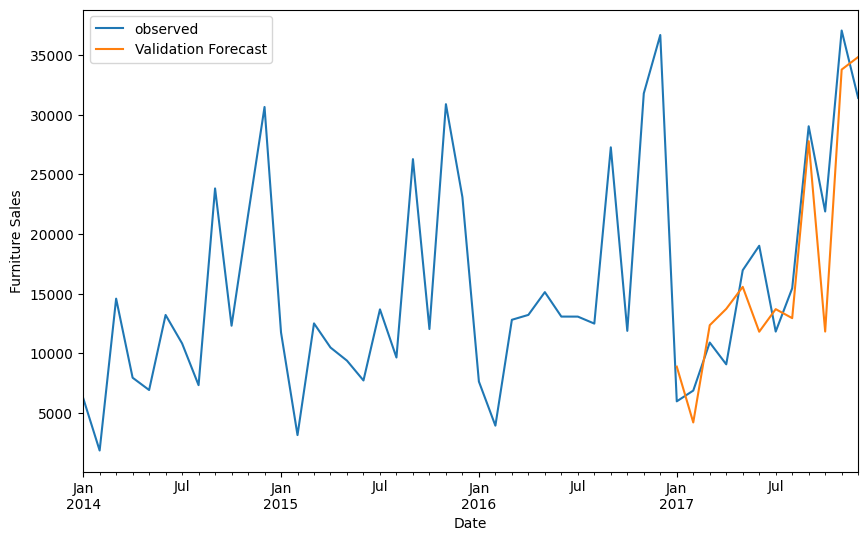

In [67]:
pred = model.get_prediction(start=pd.to_datetime("2017-01-31"))
#pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()


In [68]:
pred.predicted_mean

,predicted_mean
Order Date,
2017-01-31,8874.688653
2017-02-28,4192.985940
2017-03-31,12348.228064
2017-04-30,13716.336648
2017-05-31,15562.397283
2017-06-30,11800.514689
2017-07-31,13694.488460
2017-08-31,12939.853049
2017-09-30,27778.261725


In [71]:
Y_test = y['2017-01-31':]
Y_test

,Sales
Order Date,
2017-01-31,5964.0320
2017-02-28,6866.3374
2017-03-31,10893.4448
2017-04-30,9065.9581
2017-05-31,16957.5582
2017-06-30,19008.5867
2017-07-31,11813.0220
2017-08-31,15441.8740
2017-09-30,29028.2060


In [72]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


4363.400041008275


## Forecasting for 2018

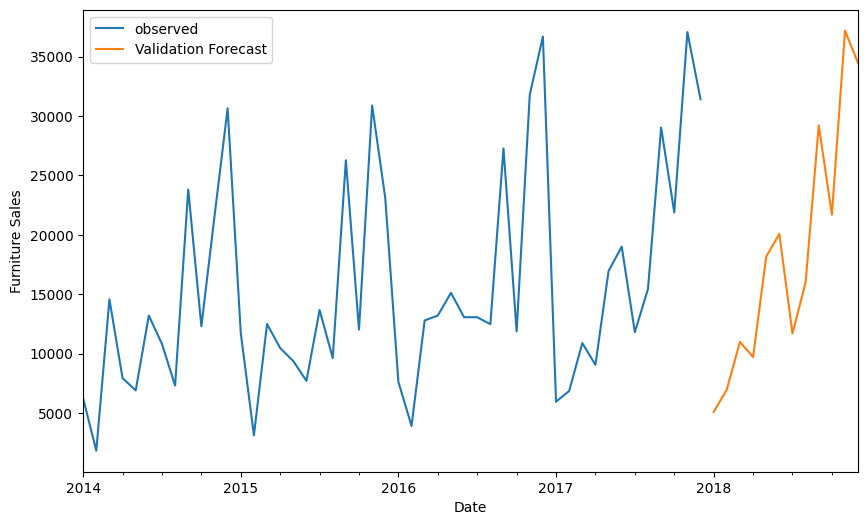

In [73]:

pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()


In [74]:
pred.predicted_mean

,predicted_mean
2018-01-31,5100.241890
2018-02-28,6991.502935
2018-03-31,10988.250550
2018-04-30,9721.771335
2018-05-31,18170.260115
2018-06-30,20073.506816
2018-07-31,11701.650570
2018-08-31,16010.459409
2018-09-30,29214.602394
2018-10-31,21694.909495


In [ ]:
pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)